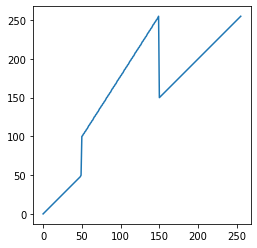

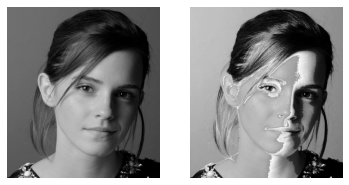

In [2]:
#Question 1
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread("emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3,t4),axis=0).astype(np.uint8)

fig,ax= plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t)==256
g = cv.LUT(f,t)

fig, ax = plt.subplots(1,2)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image",f)
cv.waitKey(0)
ax[0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[0].axis('off')
cv.imshow("Image",g)
cv.waitKey(0)
ax[1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[1].axis('off')
cv.destroyAllWindows()